# Question 1

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1.a

### Perceptron Algorithm

**Arguments**
1. X : Feature Matrix
2. Y : Label Vector
3. t : no of iteration
4. nt : learning rate (by default set to 1)
5. const : for checking the convergence

**Return**
1. w : Weight Matix

**Algorithm**
1. Converting X and Y to numpy array
2. Extracting total number of sample and feature from data
3. Initializing the weight matrix w to very small values
5. Increasing the count by 1 
4. Looping for t times<br>
    a. selecting a sample from X randomly<br>
    b. checking for wrong prediction ie., $y_nw^Tx_n < 0$<br>
        i. if wrong prediction update the weight matrix $w = w + n_ty_nx_n$ 
        ii. count = 0 not converged yet
6. If count = const<br>
     break means converged
5. return w

**Convergence Criteria**
1. If weight is not updated for fixed number(default 60) of times we are declaring this as model is converged.
2. Assuming the model will be converged in t iteration

In [191]:
def perception(X, Y, t, nt = 1, const = 60):
    
    X = np.array(X)
    Y = np.array(Y)
    
    num_sample, num_feature = X.shape
    
    #Initializing weight vector to very small number
    w = np.random.randn(1, num_feature) / 1e6 
    
    count = 0
    
    for _ in range(t): 
        
        #randomly sample one data point from the dataset
        idx = np.random.randint(0, num_sample, 1)
        
        count = count + 1
        
        if Y[idx] * np.sum(w * X[idx]) < 0:
            
            #Updating weight
            w = w + nt * (Y[idx] * X[idx])
            
            count = 0
            
        #Checking for convergence
        if count == const:
            break
            
    return w

### 1.b

### predict Function

**Argument**
1. x : test sample(s)
2. w: weight matrix

**Retuen**
1. Final prediction

**Algorithm**
1. Make prediction using formula $y_n = sign(w^Tx_n)$

In [192]:
def predict(x, w):
    return np.sign(np.sum(np.array(x) * w, axis = 1))

### Importing the "data_banknote_authentication" datafame and Preprocessing

1. Defineing the name of columns
2. Replacing the class label from (0, 1) to (-1, 1)
3. Adding a new column for bias with default value of 1

In [193]:
df = pd.read_csv("data_banknote_authentication.txt", header = None)
df.columns = ["variance", "skewness", "curtosis", "entropy", "class"]
df["class"] = df["class"].replace(0, -1)
df["bias"] = 1
df.head()

,variance,skewness,curtosis,entropy,class,bias
0,3.62160,8.6661,-2.8073,-0.44699,-1,1
1,4.54590,8.1674,-2.4586,-1.46210,-1,1
2,3.86600,-2.6383,1.9242,0.10645,-1,1
3,3.45660,9.5228,-4.0112,-3.59440,-1,1
4,0.32924,-4.4552,4.5718,-0.98880,-1,1


In [194]:
df.shape

(1372, 6)

##### Droping Duplicate Rows from the dataset

In [195]:
df = df.drop_duplicates()
df.shape

(1348, 6)

##### Handling the Outliers 

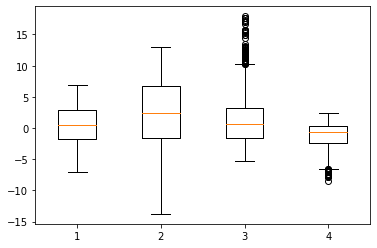

In [196]:
plt.boxplot([df.variance, df.skewness, df.curtosis, df.entropy])
plt.show()

from the above boxplot it is clearly seen that curtosis and entropy has outliers so changing it value to their extreme.

Hnadling outliers for curtosis and changing it upper extreme

In [197]:
Q1 = df['curtosis'].quantile(0.25)
Q3 = df['curtosis'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q3 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
df.loc[df['curtosis'] > upper_whisker, 'curtosis'] = upper_whisker

Hnadling outliers for entropy and changing it lower extreme

In [198]:
Q1 = df['entropy'].quantile(0.25)
Q3 = df['entropy'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q3 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
df.loc[df['entropy'] < lower_whisker, 'entropy'] = lower_whisker

Converting the Dataframe to Feature Matrix(X) and Label Vector(Y)

In [199]:
X = df.drop("class", axis=1)
Y = df["class"]

### Spliting the dataset

In [200]:
X_train = X.sample(n = 1100)
Y_train = Y[X_train.index]
X_test = X.drop(X_train.index)
Y_test = Y[X_test.index]

Printing the size of all splitted set

In [201]:
print("Training set shape  -  X_train  : ", X_train.shape, ", Y_train  :  ", Y_train.shape)
print("Test set shape  -  X_test  : ", X_test.shape, ", Y_test  :  ", Y_test.shape)

Training set shape  -  X_train  :  (1100, 5) , Y_train  :   (1100,)
Test set shape  -  X_test  :  (248, 5) , Y_test  :   (248,)


### 1.c

### 10 Fold Cross Validation

Finding the weight for which the model produces least error on Validaiton Set.<br>
**Validation Parameter = const (Convergence constant)**

1. Testing for each value of const in range(50, 500, 50)
    1. Looping over 10 times for cross validation  
        1. Creating Actual_Train and Validation dataset from training dataset
        2. Finding the weight vector using Actual_Train Dataset
        3. Predicting the classes of Validation_train using trained weight
        4. Finding the total error made on Validation Dataset
        5. Storing the weight matrix and error made on it.
    5. Calculating the average error made on current value of const
    6. Updating the weight vector if it performs better then previous weight vector
6. Printing the Least Averaged Cross Validation Error

In [255]:
for const in range(50, 500, 50):
    
    erorr = 0
    least_error = 1e6
    
    weight_matrix = []
    error_matrix = []

    for k in range(10):
        #Creating Actual_Train and Validation dataset from training dataset
        X_validation = X_train.iloc[k * 110 : (k+1)*110 -1]
        Y_validation = Y_train.iloc[k * 110 : (k+1)*110 -1]
        X_actual_train = X_train.drop(X_validation.index)
        Y_actual_train = Y_train.drop(Y_validation.index)
        
        #Finding the weight vector using Actual_Train Dataset
        w = perception(X_actual_train, Y_actual_train, 10000, const = const)
        
        #Predicting the classes of Validation_train using trained weight
        pred = predict(X_validation, w)
        
        #Finding the total error made on Validation Dataset
        curr_error = np.sum(Y_validation != pred)
        
        #Storing the weight matrix and error made on it.
        weight_matrix.append(w)
        error_matrix.append(curr_error)
        
    #Calculating the average error made on current value of const
    error = np.mean(error_matrix)
    
    #Updating the weight vector if it performs better then previous weight vector
    if least_error > error:
        least_error = error
        best_w = weight_matrix[np.argmin(error_matrix)]
    
print("Least Averaged Cross Validation Error : ", least_error)

Least Averaged Cross Validation Error :  0.8


### 1.d

Predicting the class of test set using best weight come from 10 Cross Validaiton

In [256]:
pred = predict(X_test, best_w)

Reporing the final error using best model on test set

In [257]:
np.sum(pred!=Y_test)

1

Initializing the values of True positive(TP), True Negative(TN), False Positive(FP), False Negative(FN) to 0
1. True Positive (TP) : if actual and predicted values both are true
2. True Negative (TN) : if actual anf predicted values both are false
3. False Negative (FN) : if actual value is true but predicted value is false
4. False Positive (FP) : if actual value is negative but predicted value is true

In [258]:
TP = 0
TN = 0
FP = 0
FN = 0

Calculating the values of confusion matrix

In [259]:
for i in range(len(pred)):
    if pred[i] == Y_test.iloc[i] == 1:
        TP = TP + 1
    elif pred[i] == Y_test.iloc[i] == -1:
        TN = TN + 1
    elif (pred[i] == 1) and (Y_test.iloc[i] == -1):
        FP = FP + 1
    else:
        FN = FN + 1

In [260]:
print(TP, TN, FP, FN)

103 144 0 1


Calculating precision, recall and F1 Score

\begin{equation} Precision = \frac{TP}{TP + FP} \end{equation}

\begin{equation} Recall = \frac{TP}{TP + FN} \end{equation}

\begin{equation} F1 Score = \frac{2 * Precision * Recall }{Precision + Recall} \end{equation}

In [261]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1_score = (2 * precision * recall) / (precision + recall)
print("Precision on Test Set using best weight", round(precision, 4))
print("Recall on Test Set using best weight", round(recall, 4))
print("F1 Score on Test Set using best weight", round(F1_score, 4))

Precision on Test Set using best weight 1.0
Recall on Test Set using best weight 0.9904
F1 Score on Test Set using best weight 0.9952


# Question 2

### 2.a

# Derivation of Likelihood from Data 

Lets assume $n$ number of sample are gererared $i.i.d$ from gaussian distribution $N(\mu, \sigma^2)$ where $\mu$ and $\sigma^2$ are mean and variacne of distribution and both are known constant.

Since Likelihood is calculated for gaussian distribution, distribution of likelihood will also be gaussian $N(\mu_L, \sigma^2_L)$

\begin{equation} Likelihood = P(y| \mu, \sigma^2) = P(y_1, y_2, ....., y_n | \mu, \sigma^2)\end{equation}

samples are drawn from distribution $iid$

\begin{equation} P(y_1, y_2, ....., y_n | \mu, \sigma^2) = \prod_{i = 1}^{n}{P(y_i| \mu, \sigma^2)}\end{equation}

\begin{equation} = \prod_{i = 1}^{n}{\frac{1}{\sqrt{2\pi\sigma^2}}exp\left({-\frac{(y_i - \mu)^2}{2\sigma^2}}\right)}      \end{equation} 

\begin{equation} = \left( \frac{1}{2\pi\sigma^2} \right)^{n/2}exp\left(\sum_{i = 1}^{n}{-\frac{(y_i - \mu)^2}{2\sigma^2}}\right) \end{equation}

Neglating the constant terms

\begin{equation} \propto{exp\left(\sum_{i = 1}^{n}{-\frac{(y_i - \mu)^2}{2\sigma^2}}\right) } \end{equation}

\begin{equation} = exp\left( \frac{-1}{2\sigma^2}\sum_{i = 1}^{n}{(y_i^2 + \mu^2 - 2 \mu y_i)} \right) \end{equation} 

\begin{equation} = exp\left( \frac{-1}{2\sigma^2}\left( \sum_{i = 1}^{n}{y_i^2} + \sum_{i = 1}^{n}{\mu^2} -2 \mu \sum_{i = 1}^{n}{y_i}\right)\right) \end{equation}

\begin{equation} = exp\left( \frac{-1}{2\sigma^2}\left( \sum_{i = 1}^{n}{y_i^2} + n\mu^2 -2 \mu n \bar{y}\right)\right) \end{equation}

\begin{equation} = exp\left( \frac{-n}{2\sigma^2}\left( \mu^2 - 2 \mu \bar{y} + \frac{\sum_{i = 1}^{n}{y_i}}{n} \right)\right)       .... (i)\end{equation}

expected result 

\begin{equation} N(\mu_{L}, \sigma_{L}^{2}) \propto exp\left( \frac{-1}{2\sigma^{2}_{L}}\left(\mu - \mu_{L} \right)^2\right) = exp\left( \frac{-1}{2\sigma^{2}_{L}}\left( \mu^2 - 2 \mu \mu_{L} + \mu_{L}^{2} \right)\right)  .... (ii)\end{equation}

Now comparing the coefficient of $\mu^2$ from equation $(i)$ and $(ii)$, we get

\begin{equation} \frac{n}{2\sigma^2}  = \frac{1}{2\sigma_{L}^{2}} \end{equation}

\begin{equation} \sigma_{L}^{2} = \frac{\sigma^{2}}{n}   .... (iii)\end{equation}

Comparing the coefficient of $-2\mu$ from equation $(i)$ and $(ii)$, we get

\begin{equation} \frac{n\bar{y}}{2\sigma^{2}} = \frac{\mu_{L}}{2\sigma_{L}^{2}} \end{equation}

\begin{equation} \mu_{L} =  \sigma_{L}^{2}\frac{n\bar{y}}{\sigma^2}\end{equation}

putting the value of $\sigma_{L}^{2}$ from equation $(iii)$, we get

\begin{equation} \mu_{L} = \bar{y} ....(iv)\end{equation}

Using equation $(iii)$ and $(iv)$, we get

\begin{equation} Likelihood : P(y|\mu, \sigma^2) \sim N(\bar{y}, \sigma^2 / n) \end{equation}

In [20]:
#Setting the random.seed to 0
np.random.seed(0)

#### guassian function

This function will return vector of gaussian probabilty calculated on X data using mean and var

In [21]:
def gaussian(X, mean, var):
    return np.exp((-(np.square(X-mean)))/(2*var))/(np.sqrt(2*np.pi*var))

n = number of sample

In [22]:
n = 50

1. Sampling from gaussian distribution $N(10, 25)$ with mean : $\mu = 10$ and variance : $\sigma^2 = 25$

2. Sorting the sample

In [63]:
sample_mean = 10
sample_std = 5
sample_var = np.square(sample_std)
sample = np.random.normal(sample_mean, sample_std, n)
sample = np.sort(sample)

Calculating Likelihood for above sample from gaussian distribution $N(\mu_L, \sigma_L^2)$<br> 

where $\mu_L = \bar{y}$ and  $\sigma_L^2 = \frac{\sigma^2}{n}$

In [64]:
likelihood_mean = np.mean(sample)
likelihood_variance = np.var(sample)/n
likelihood_prob = gaussian(sample, likelihood_mean, likelihood_variance)

1. Sampling prior from gaussian distribution $N(25, 25)$ with mean : $\mu_{prior} = 25$, variance : $\sigma_{prior}^2 = 25$ and standard deviation : $\sigma_{prior} = 5$

2. Sorting the prior sample and Calculating its probability

In [65]:
prior_mean = 25
prior_std = 5
prior_var = np.square(prior_std)
prior = np.random.normal(prior_mean, prior_std, n)
prior = np.sort(prior)
prior_prob = gaussian(prior, prior_mean, prior_var)

1. Sampling powsterior from gaussian distribution $N(\mu_{posterior}, \sigma_{posterior}^2)$ <br>
where $\sigma_{posterior}^2 = \left(\frac{1}{\sigma_{prior}^2} + \frac{1}{\sigma_{likelihood}^2}\right)^{-1}$<br>
and $\mu_{posterior} = \sigma_{posterior}^2\left(  \frac{\mu_{prior}}{\sigma_{prior}^2} + \frac{\mu_{likelihood}}{\sigma_{likelihood}^2} \right)$<br>

2. Sorting the posterior and Calculating its probability.


In [66]:
posterior_var = 1 / ((1/prior_var) + (1 / likelihood_variance)) 
posterior_mean = posterior_var * ((prior_mean/prior_var) + (likelihood_mean / likelihood_variance))
posterior = np.random.normal(posterior_mean, np.sqrt(posterior_var), n)
posterior = np.sort(posterior)
posterior_prob = gaussian(posterior, posterior_mean, posterior_var)

### Ploting the Likelihood, Prior and Posterior

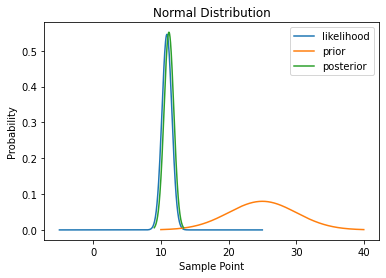

In [67]:
#Creting sample point for likelihood and finding its probability
x_data = np.linspace(sample_mean - 3*sample_std, sample_mean + 3* sample_std, 500)
y_likelihood = gaussian(x_data, likelihood_mean, likelihood_variance)

#Creting sample point for prior and finding its probability
x_prior = np.linspace(prior_mean - 3*prior_std, prior_mean + 3* prior_std, 500)
y_prior = gaussian(x_prior, prior_mean, prior_var)

#Creting sample point for posterior and finding its probability
x_posterior = np.linspace(posterior_mean - 3*np.sqrt(posterior_var), posterior_mean + 3*np.sqrt(posterior_var), 500)
y_posterior = gaussian(x_posterior, posterior_mean, posterior_var)

plt.plot(x_data, y_likelihood, label = "likelihood")
plt.plot(x_prior, y_prior, label = "prior")
plt.plot(x_posterior, y_posterior, label = "posterior")
plt.xlabel("Sample Point")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.legend()
plt.show()

### 2.b

### get_likelihood function

This function return the total likelihood probability of the sample

\begin{equation} Total Likelihood Probability = \prod_{i = 1}^{n}{P(y_i|\mu, \sigma^2)}\end{equation}

where $P(y_i|\mu, \sigma^2)$ is Gaussian Distribution

In [47]:
def get_likelihood(sample, mean, std):
    var = np.square(std)
    return np.prod(gaussian(sample, mean, var))    

### get_prior function

This function return the probability of candidate from Prior Distribution

\begin{equation} P(candidate) = N(candidate | \mu, \sigma^2)\end{equation}

where $N(\mu, \sigma^2)$ is Prior Probability Distribution

In [48]:
def get_prior(candidate, mean, std):
    var = np.square(std)
    return gaussian(candidate, mean, var)

### get_posterior function

This function return posterior probability of candidate given sample data


\begin{equation} P(candidate |sample) = P(candidate) * P(sample|candidate)\end{equation}

\begin{equation} P(candidate |sample) = Prior * Likelihood\end{equation}

In [49]:
def get_posterior(sample, candidate, p_mean, p_var, l_var):
    
    prior = get_prior(candidate, p_mean, p_var)
    likelihood = get_likelihood(sample, candidate, l_var)
    posterior = prior * likelihood
    
    return posterior

### MCMC Function

**Arguments**
1. itr : Number of Iteration
2. data : Distribution of Sample
3. p_mean : Mean of Prior Distribution
4. p_std : Standard Deviation of Prior Distribution
5. convergence : If Set True the  break the on convergence

**Return**
1. sample : MCMC Sampled mean
2. i: Number of iteration used before convergence
3. acceptance : total number of new candidate accepted 


**Algorithm**

1. Initialize the satrting value of theta(mean)


2. Generate a proposal candidate$(\theta)$ from jump distrubtion $J(\theta|\theta_{t-1})$ which in this case is $N(\theta_{t-1}, \sigma^2)$


3. Find the ratio of posterior of the proposal to the posterior of the current value
\begin{equation} prob = \frac{P(\theta_t)P(sample|\theta_t)}{P(\theta_{t-1})P(sample|\theta_{t-1})} \end{equation}


4. Generate a random number from uniform distribution i.e., $a \sim Uniform(0, 1)$


5. If a < prob accept the candidate $\theta_t$ and it list of sample else reject it and append previous value of theta $\theta_{t-1}$.


6. Repeat to step 2 until convergence



**Convergence Criteria**
1. Checking for convergence after crossing the boundary of 500.
2. Checking for convergence after every 500 iteration.
3. Declaring converged when there is no change in mean of distribution for current and previous 500 iteration



In [50]:
def MCMC(itr, data, p_mean, p_std, std = 5, convergence = False):
    
    var = np.square(std)
    
    sample = [5]
    
    prev_mean = np.mean(sample)
    
    acceptance = 0
    
    for i in range(itr):
        
        candidate = np.random.normal(sample[-1], var)
        
        prob = min(1, (get_posterior(data, candidate, p_mean, p_std, 5) / get_posterior(data, sample[-1], p_mean, p_std, 5)))
        
        if np.random.uniform(0, 1) < prob:
            
            sample.append(candidate)
            acceptance = acceptance + 1
        
        else:
            sample.append(sample[-1])
        
        if convergence and (i >5000) and (i%500 == 0) :
            
            cur_mean = np.mean(sample[-500:])
        
            if (abs(prev_mean - cur_mean) < 1e-3):
                break
            prev_mean = cur_mean
    
    
    return sample, i, acceptance


Finding the Posterior distributio Using MCMC sampling on sample(i.e., above used) and known prior

In [69]:
mcmc, itr, acceptance = MCMC(100000, sample, 25, 5, 0.5)

Neglating the initial 10% of values as burnout process

In [70]:
sam = mcmc[int(0.1 * len(mcmc)):]

Ploting the Histogram of sample generate by MCMC and actual postrior distribution

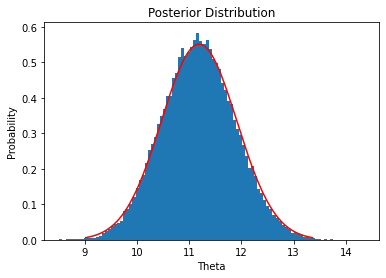

In [71]:
plt.hist(sam, bins=100, density=True)
plt.plot(x_posterior, y_posterior, color = "red")
plt.xlabel("Theta")
plt.ylabel("Probability")
plt.title("Posterior Distribution")
plt.show()

### 2.c

### Optimal proposal width

**Small proposal width : Large acceptance Rate but SLOW movement :** if $\sigma$ is small then all proposed moves will be accepted, but they will represent small movement, so overall chain is not mixed well.



**Large proposal width : Large Rejection Rate but FAST movement :** similarly if if $\sigma$ is very large, then most moves will be rejected, so the chain will usually not move at all.


**See the last 3 graph for explanation**.

What is needed is a value of $\sigma$ between the two extremes, thus allowing for reasonable-sized proposal moves together with a reasonably high acceptance probability.

Solution : Choose the proposal width which is far from both extreme.  

We are checking the MCMC series for different proposal width with 5 fold averaging for more accurate calculation of acceptane rate.

In [35]:
sd = [0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 15, 20]

In [36]:
l = []

for i in sd:
    
    acc = []
    it = []
    
    for j in range(5):
    
        mcmc, itr, acceptance = MCMC(100000, sample,25, 5, std = i, convergence=True)
        
        it.append(itr)
        acc.append(acceptance)
    
    l.append([i, np.mean(itr), np.mean(acceptance)])

Calculating the mean acceptance rate for all proposal width and ploting it.

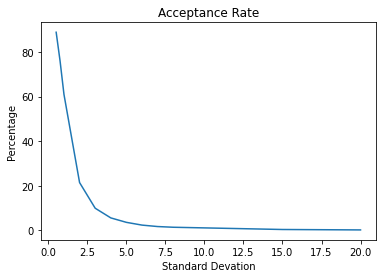

In [37]:
x = np.array(l)[:, 2] * 100 / np.array(l)[:, 1]
plt.plot(sd,x)
plt.xlabel("Standard Devation")
plt.ylabel("Percentage")
plt.title("Acceptance Rate")
plt.show()

### Optimal value for sigma
From the above plot we can say acceptance rate of proposal width in range **[1 - 3]** is optimal.
For single optimal proposal width I will say **2**.

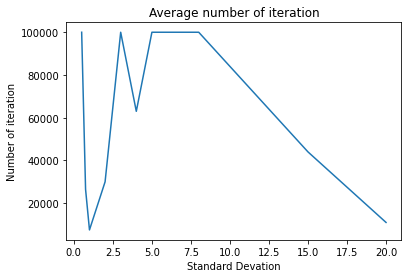

In [38]:
plt.plot(sd,np.array(l)[:, 1])
plt.xlabel("Standard Devation")
plt.ylabel("Number of iteration")
plt.title("Average number of iteration")
plt.show()

Usually smaller value sigma converges faster than larger value of sigma

##### Demonstrate the consequences of using sub-optimal proposal width and terminating sampling too soon.

**Large Sigma :**
From the below graph it can clearly seen that having larger $\sigma = 8$  reject most of the candidate values that means it requires large number of iteration to completly reflect original distribution. 

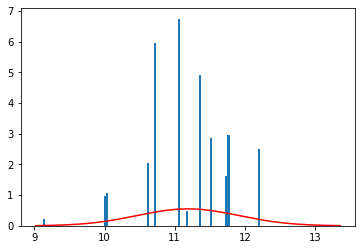

In [92]:
mcmc, itr, acceptance = MCMC(1000, sample,25, 5, std = 8)
sam = mcmc[int(0.1 * len(mcmc)):]
plt.hist(sam, bins=100, density=True)
plt.plot(x_posterior, y_posterior, color = "red")
plt.show()

**Small Sigma :** When using smaller value of sigma $\sigma = 1$ movement is very slow means it requirs large numbe of iteration of reach original distribution

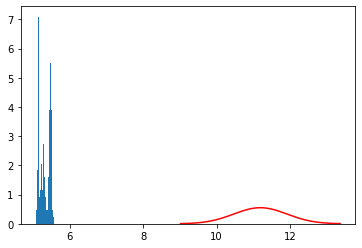

In [80]:
mcmc, itr, acceptance = MCMC(1000, sample,25, 5, std = 0.1)
sam = mcmc[int(0.1 * len(mcmc)):]
plt.hist(sam, bins=100, density=True)
plt.plot(x_posterior, y_posterior, color = "red")
plt.show()

**Sigma from optimal range :** When using value of $\sigma$ from the optimal range decenet number of candidate are accepted and movement is also fast

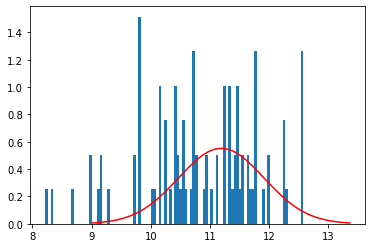

In [79]:
mcmc, itr, acceptance = MCMC(100, sample,25, 5, std = 1)
sam = mcmc[int(0.1 * len(mcmc)):]
plt.hist(sam, bins=100, density=True)
plt.plot(x_posterior, y_posterior, color = "red")
plt.show()